# Myopia Clusters

## Background

You are on the data science team of a medical research company that’s interested in finding better ways to predict myopia, or nearsightedness. Your team has tried—and failed—to improve their classification model when training on the whole dataset. However, they believe that there might be distinct groups of patients that would be better to analyze separately. So, your supervisor has asked you to explore this possibility by using unsupervised learning.

You have been provided with raw data, so you’ll first need to process it to fit the machine learning models. You will use several clustering algorithms to explore whether the patients can be placed into distinct groups. Then, you’ll create a visualization to share your findings with your team and other key stakeholders.

* Part 1: Prepare the Data
* Part 2: Apply Dimensionality Reduction
* Part 3: Perform a Cluster Analysis with K-means
* Part 4: Make a Recommendation

## Part 1: Prepare the Data

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

Load the data into a Pandas DataFrame and fetch the top 10 rows.

In [2]:
# Data loading
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


List the DataFrame's data types to ensure they're aligned to the type of data stored on each column.

In [3]:
# List dataframe data types
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

Remove the "MYOPIC" column from the dataset. The target column is needed for supervised machine learning, but it will make an unsupervised model biased.

In [4]:
# First assign "MYOPIC" Column to labels variable for future use in analysis
labels = df['MYOPIC']

In [5]:
# Remove the "MYOPIC" Column
df = df.drop(columns=["MYOPIC"])
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


Remove all rows with `null` values if any.

In [6]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


Remove duplicate entries if any.

In [7]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values. Scale all columns except for `MOMMY` and `DADMY` as these are binary columns. We want to bring all other columns closer into range of the binary columns.

In [8]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 
                                       'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR']])

In [9]:
# A list of the columns from the original DataFrame
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [10]:
# Create a DataFrame with the transformed data
scaled_data = pd.DataFrame(scaled_data, columns=df.columns[0:12])
scaled_data['MOMMY'] = df['MOMMY']
scaled_data['DADMY'] = df['DADMY']
scaled_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0


## Part 2: Apply Dimensionality Reduction

In [11]:
# import PCA
from sklearn.decomposition import PCA

Rather than specify the number of principal components, the desired explained variance of 90% (n_components=0.9) will be used for dimensionality reduction.

In [12]:
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(scaled_data)

In [13]:
# Fetch the explained variance
print(f'Shape: {myopia_pca.shape}')
print(f'Explained Variance Ratios: {pca.explained_variance_ratio_}')
print(f'Sum of Explained Variance Ratios: {pca.explained_variance_ratio_.sum()}')

Shape: (618, 9)
Explained Variance Ratios: [0.23709653 0.17470773 0.09439418 0.08260749 0.07899141 0.07203043
 0.07101828 0.05837071 0.0488404 ]
Sum of Explained Variance Ratios: 0.9180571519113612


The PCA model reduced our features from 14 to 9, and the explained variance ratio shows the proportion of the data explained by the 9 features. Next, we further reduce the dataset dimensions with t-SNE and visually inspect the results.

In [14]:
# import TSNE
from sklearn.manifold import TSNE

In [15]:
# Run t-SNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(myopia_pca)

/Users/jasonnoble/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [16]:
# Transform TSNE data to a DataFrame
df_tsne = pd.DataFrame(
    data=transformed_features,
    columns=["x", "y"],
)
df_tsne.head()

,x,y
0,11.242762,17.724306
1,-1.316965,-11.888868
2,-4.040193,1.022123
3,9.548642,12.021361
4,-6.791715,-18.941189


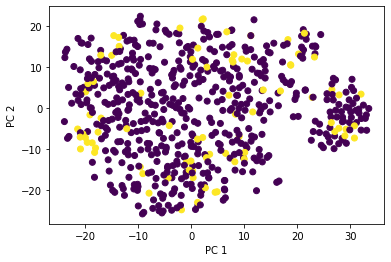

In [21]:
import matplotlib.pyplot as plt

# Plot the results. Are there distinct clusters?
plt.scatter(df_tsne["x"], df_tsne["y"], c=labels)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Part 3: Perform a Cluster Analysis with K-means

In [18]:
# import KMeans
from sklearn.cluster import KMeans

In [19]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,213798.187500
1,2,120044.406250
2,3,71826.625000
3,4,52824.535156
4,5,42280.992188


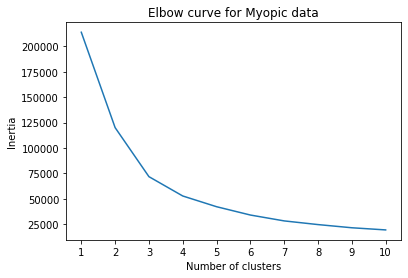

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopic data')
plt.show()

* Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

In [22]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

Analyzing Clusters with the Best Value of `k`

In [23]:
# use function created above to classify data into 3 clusters
clusters = get_clusters(3, df_tsne)

In [24]:
# show dataframe with classes
clusters

,x,y,class
0,11.242762,17.724306,2
1,-1.316965,-11.888868,1
2,-4.040193,1.022123,0
3,9.548642,12.021361,2
4,-6.791715,-18.941189,1
...,...,...,...
613,-2.120718,19.583763,0
614,-1.124644,-11.662654,1
615,-6.392745,-10.971079,1
616,-3.248232,9.252018,0


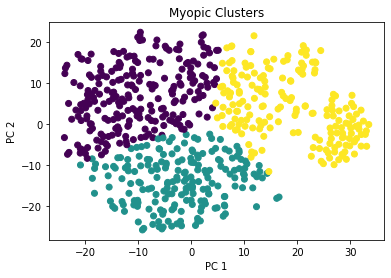

In [25]:
# plot and use class as color to visualize clusters
plt.scatter(x=clusters['x'], y=clusters['y'], c=clusters['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Myopic Clusters')
plt.show()

## Part 4: Make a Recommendation

Based on the elbow curve, the optimal number of clusters for this analysis is three.

* **Recommendation:** Use the 3 separate clusters for further analysis to see if the distinct groups provide better results than the whole dataset.